In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

In [10]:
import math

def entropy( x, b ):
    s = 0
    for p in x:
        if p > 0:
            s += -p*math.log(p,b)
        # end
    # end
    return s
# end

def visualize_regions(model, MAX, nGrid):
    a1 = np.linspace(-MAX, MAX, nGrid)
    a2 = np.linspace(-MAX, MAX, nGrid)

    A1, A2 = np.meshgrid(a1, a2)
    A1 = A1.flatten()
    A2 = A2.flatten()
    A = np.vstack((A1, A2)).T

    # Predict B
    B = model.predict(A)
    B = B.reshape(nGrid, nGrid)
    B = np.flipud(B)

    # Compute entropy for S
    prob_2D = model.predict_proba(A)
    S = np.array([entropy(p, 2) for p in prob_2D])
    S = S.reshape(nGrid, nGrid)
    S = np.flipud(S)

    return B, S
# end
    
def GenerateData(n_pts1,n_pts2,center_sep,std):
    
    cov = std**2*np.eye(2)
    
    x1 = np.random.multivariate_normal(mean=[-center_sep/2,0],
                                       cov=cov,
                                       size=n_pts1)
    y1 = np.zeros(n_pts1)
    
    x2 = np.random.multivariate_normal(mean=[center_sep/2,0],
                                       cov=cov,
                                       size=n_pts2)
    y2 = np.ones(n_pts2)
    
    X = np.concatenate((x1,x2),axis=0)
    y = np.concatenate((y1,y2),axis=0).astype(int)
    
    return X, y
# end

# Create data

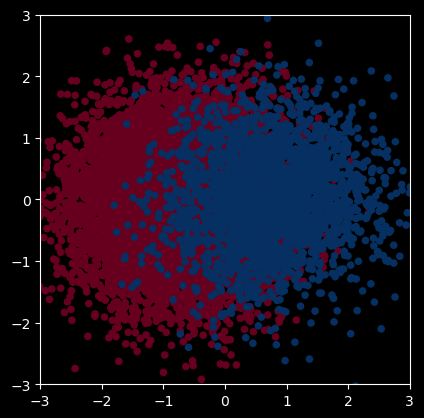

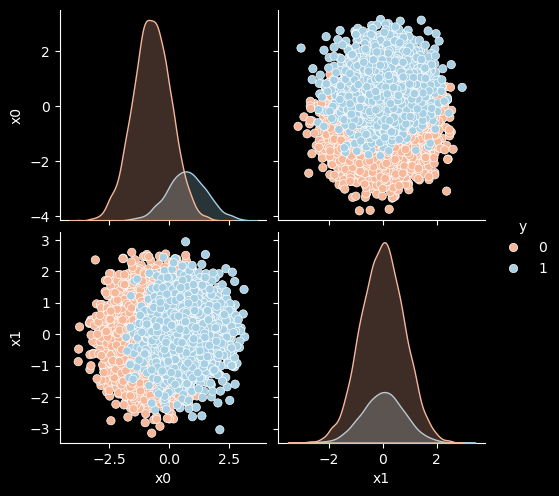

In [13]:
#np.random.seed(0)

n_pts0     = 10000
n_pts1     = 2500
std        = 0.8
center_sep = 1.5

# generate data
X, y = GenerateData(
    n_pts0,
    n_pts1,
    center_sep,
    std
)

MAX = np.max(np.abs(X))

cmap = 'RdBu'

plt_scale = 3
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=cmap)
plt.xlim(-plt_scale,plt_scale)
plt.ylim(-plt_scale,plt_scale)
plt.gca().set_aspect('equal')
plt.show()

df = pd.DataFrame( {"x0":X[:,0], "x1":X[:,1], "y":y} )
sns.pairplot(df, hue='y', palette='RdBu')
plt.show()

# Modeling w/ class weights

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y
)

LogisticRegression(class_weight={0: 0.9375, 1: 0.0625})
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2000
           1       0.98      0.09      0.16       500

    accuracy                           0.82      2500
   macro avg       0.90      0.54      0.53      2500
weighted avg       0.85      0.82      0.75      2500



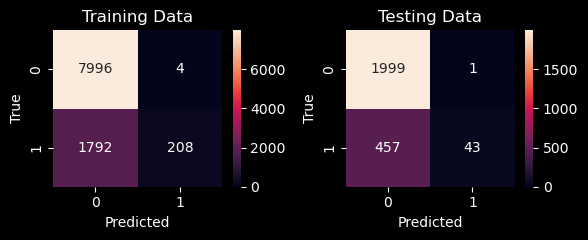

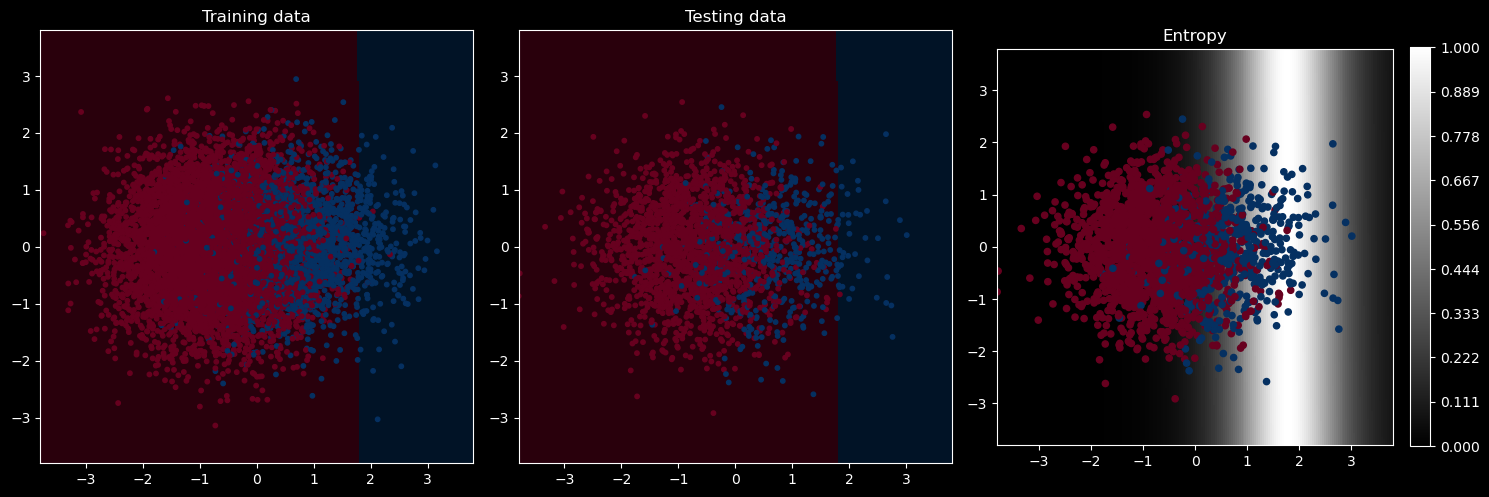



LogisticRegression(class_weight={0: 0.875, 1: 0.125})
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      2000
           1       0.91      0.18      0.30       500

    accuracy                           0.83      2500
   macro avg       0.87      0.59      0.60      2500
weighted avg       0.85      0.83      0.78      2500



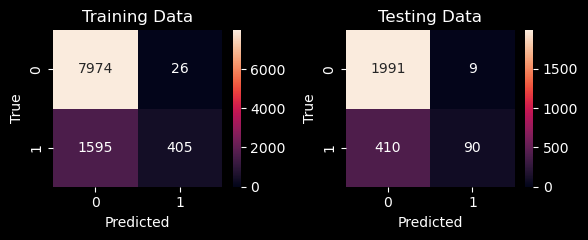

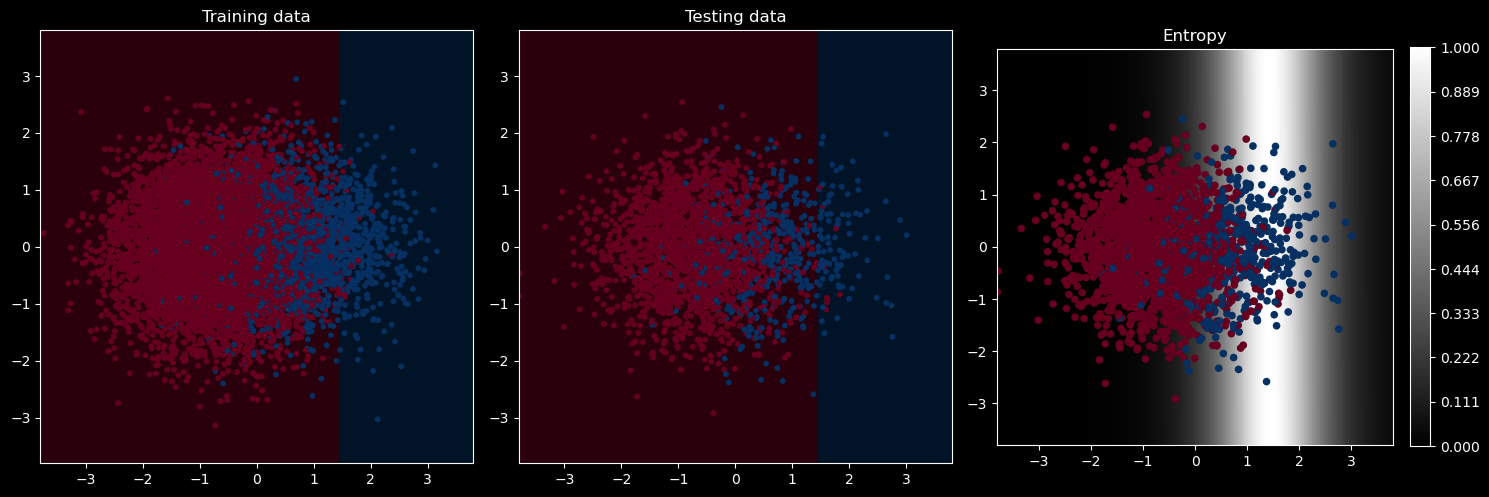



LogisticRegression(class_weight={0: 0.8125, 1: 0.1875})
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2000
           1       0.89      0.23      0.37       500

    accuracy                           0.84      2500
   macro avg       0.86      0.61      0.64      2500
weighted avg       0.85      0.84      0.80      2500



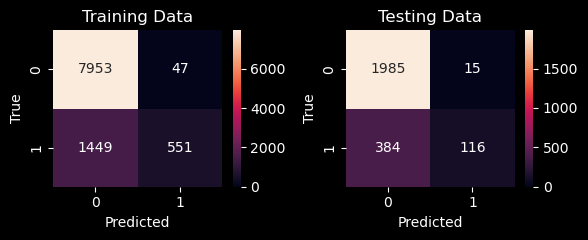

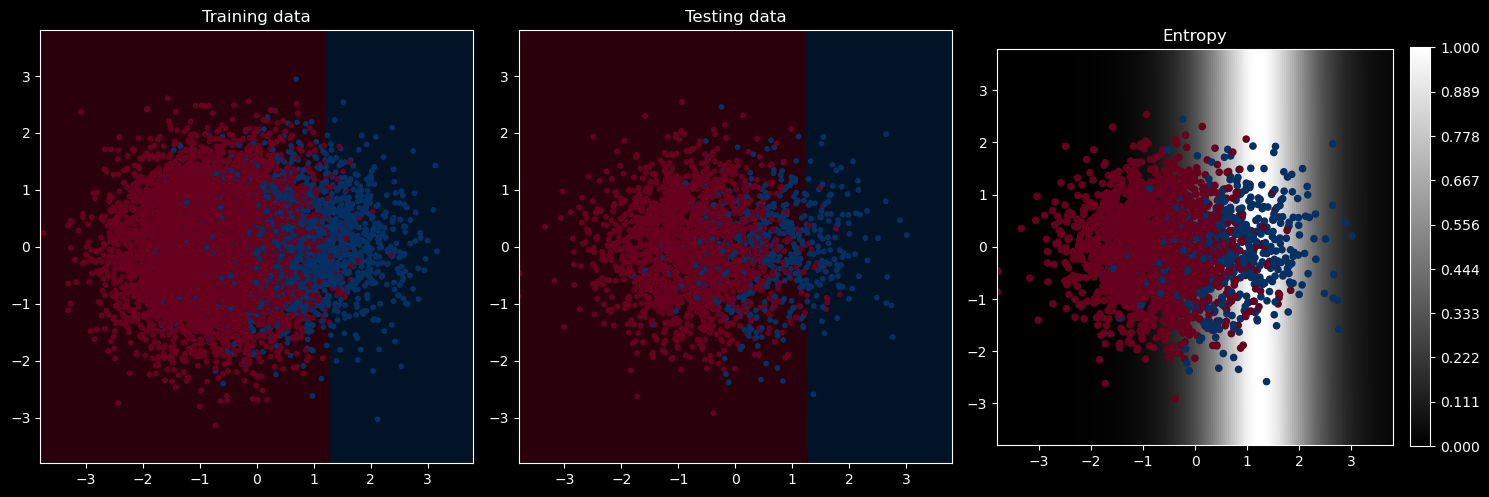



LogisticRegression(class_weight={0: 0.75, 1: 0.25})
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2000
           1       0.87      0.29      0.44       500

    accuracy                           0.85      2500
   macro avg       0.86      0.64      0.68      2500
weighted avg       0.85      0.85      0.82      2500



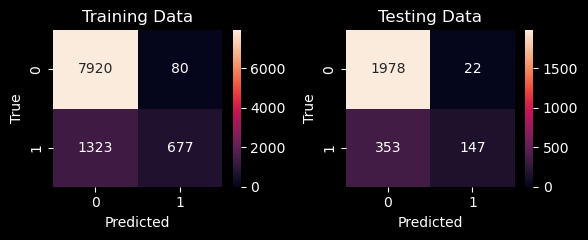

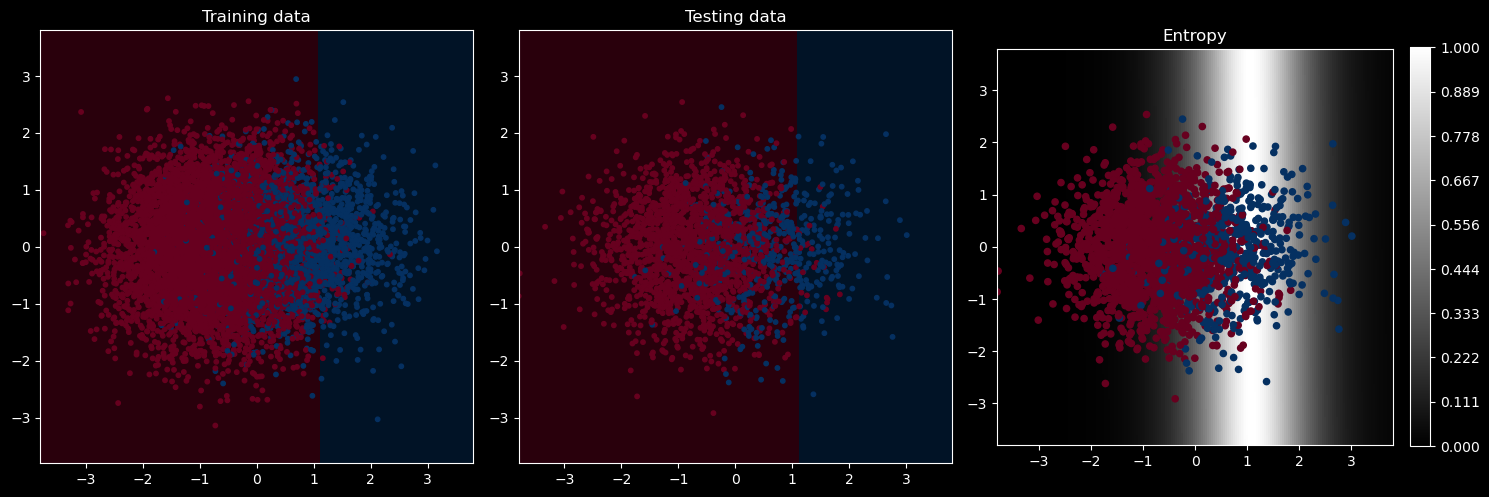



LogisticRegression(class_weight={0: 0.6875, 1: 0.3125})
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2000
           1       0.85      0.37      0.51       500

    accuracy                           0.86      2500
   macro avg       0.85      0.68      0.72      2500
weighted avg       0.86      0.86      0.84      2500



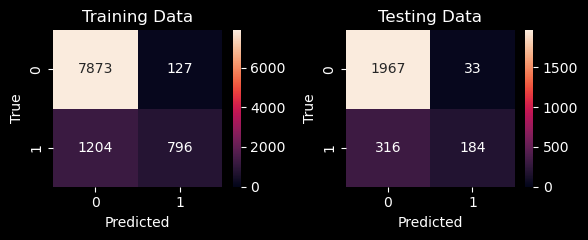

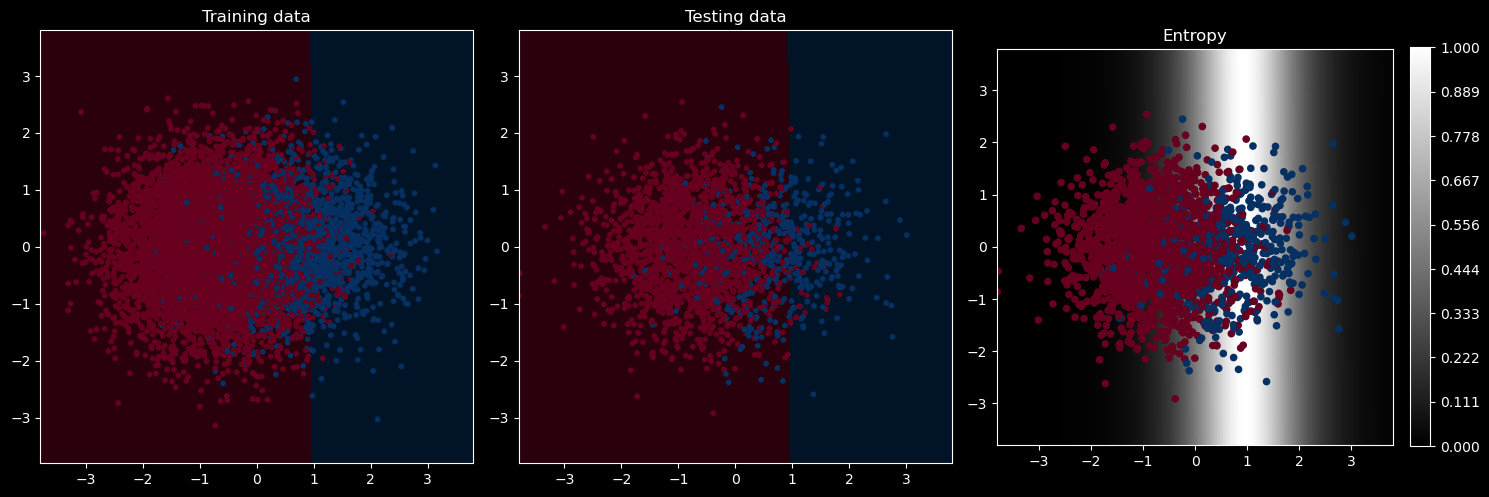



LogisticRegression(class_weight={0: 0.625, 1: 0.375})
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2000
           1       0.83      0.43      0.56       500

    accuracy                           0.87      2500
   macro avg       0.85      0.70      0.74      2500
weighted avg       0.86      0.87      0.85      2500



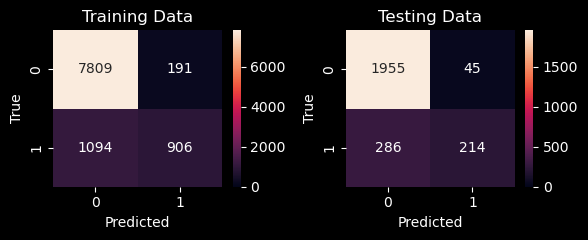

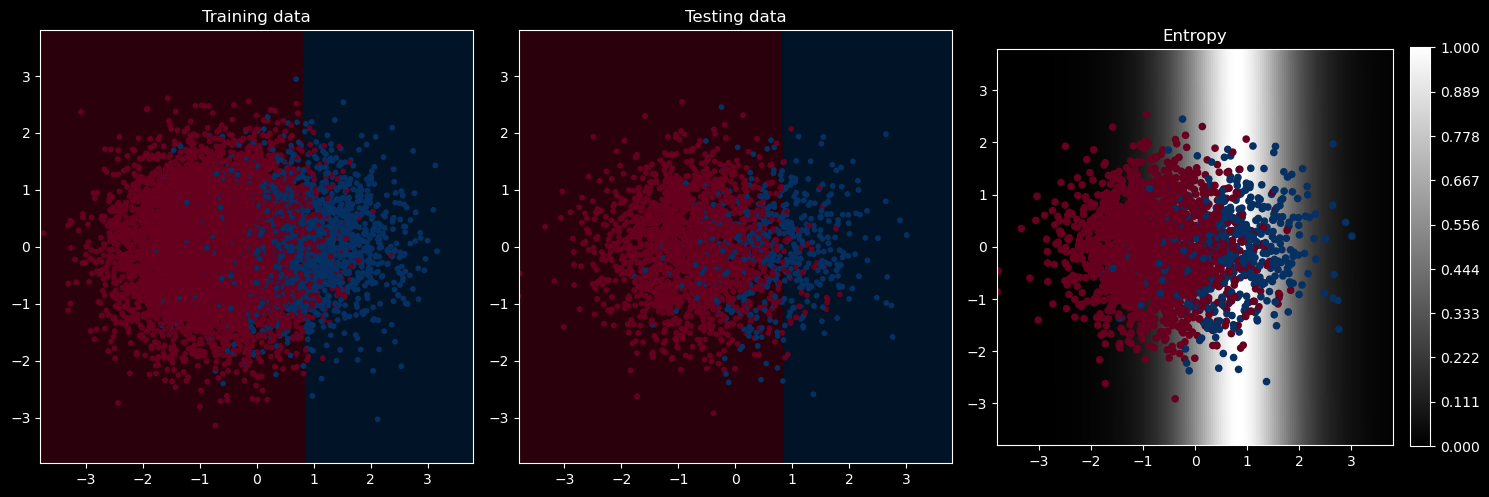



LogisticRegression(class_weight={0: 0.5625, 1: 0.4375})
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2000
           1       0.79      0.48      0.60       500

    accuracy                           0.87      2500
   macro avg       0.84      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



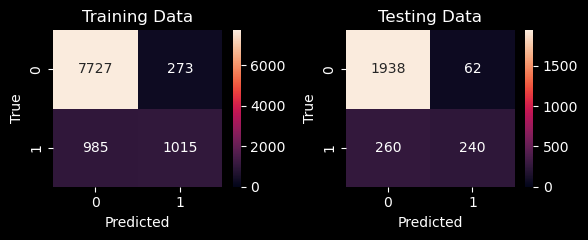

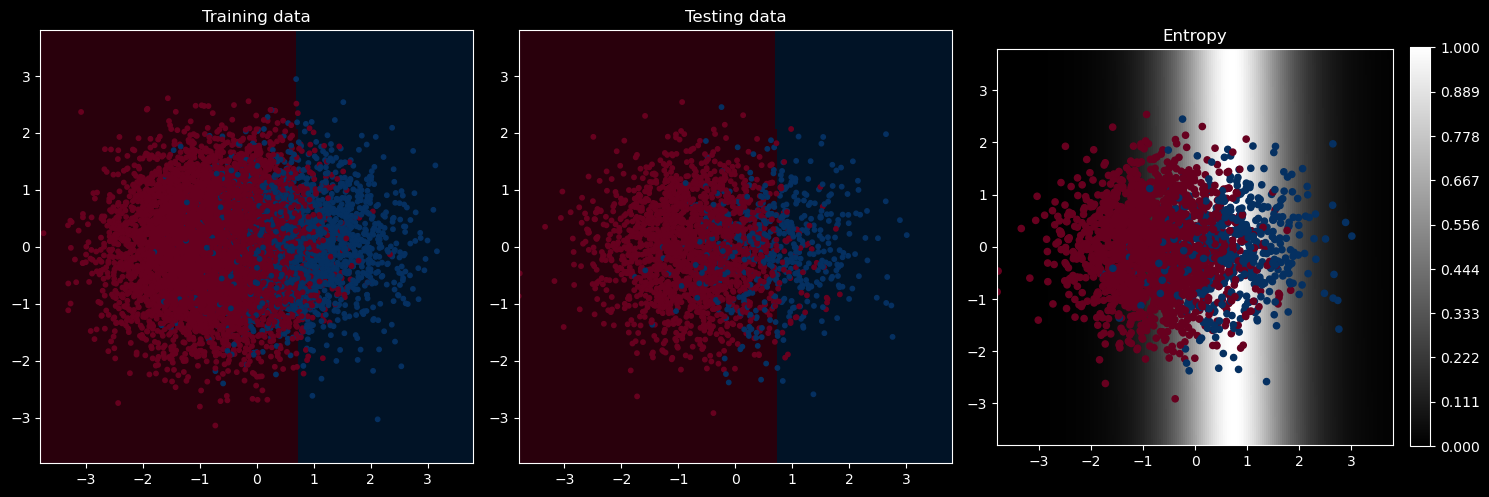



LogisticRegression(class_weight={0: 0.5, 1: 0.5})
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2000
           1       0.76      0.55      0.63       500

    accuracy                           0.87      2500
   macro avg       0.83      0.75      0.78      2500
weighted avg       0.87      0.87      0.87      2500



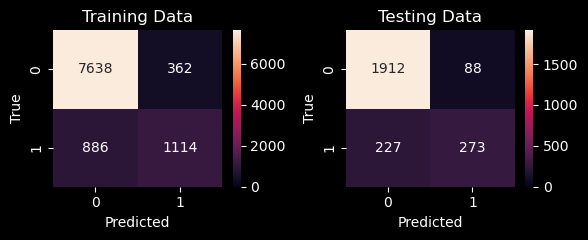

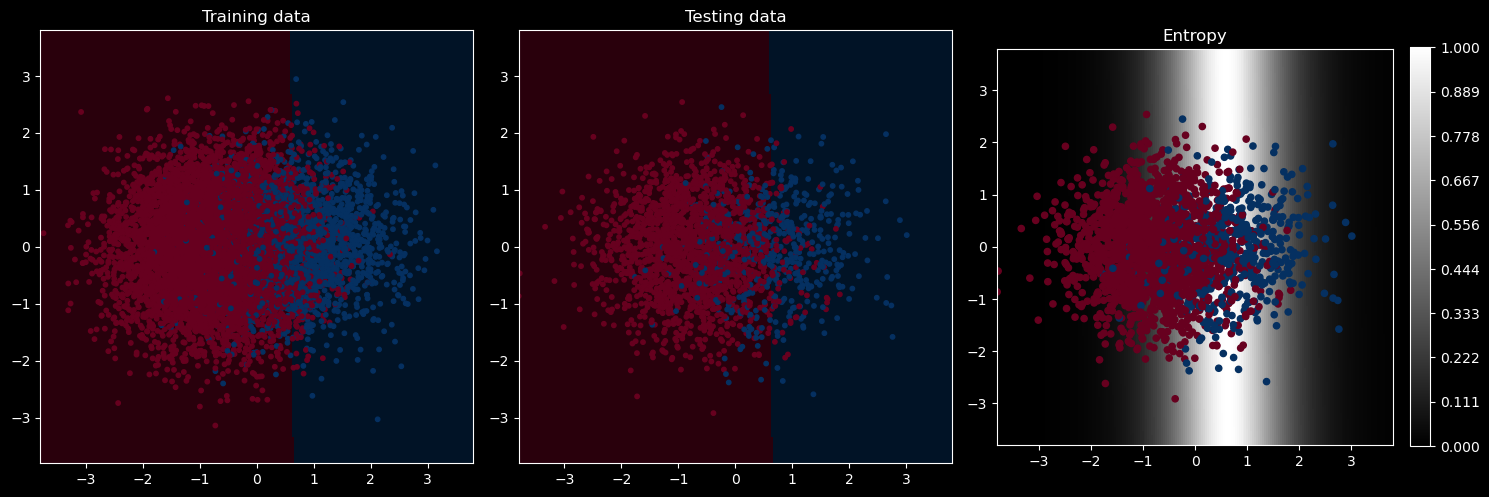



LogisticRegression(class_weight={0: 0.4375, 1: 0.5625})
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2000
           1       0.73      0.60      0.66       500

    accuracy                           0.88      2500
   macro avg       0.82      0.77      0.79      2500
weighted avg       0.87      0.88      0.87      2500



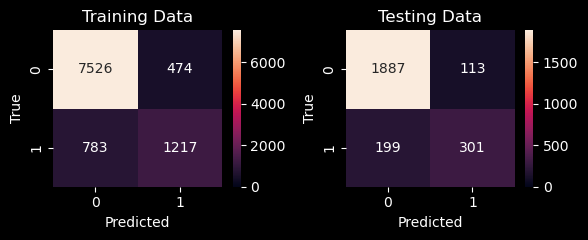

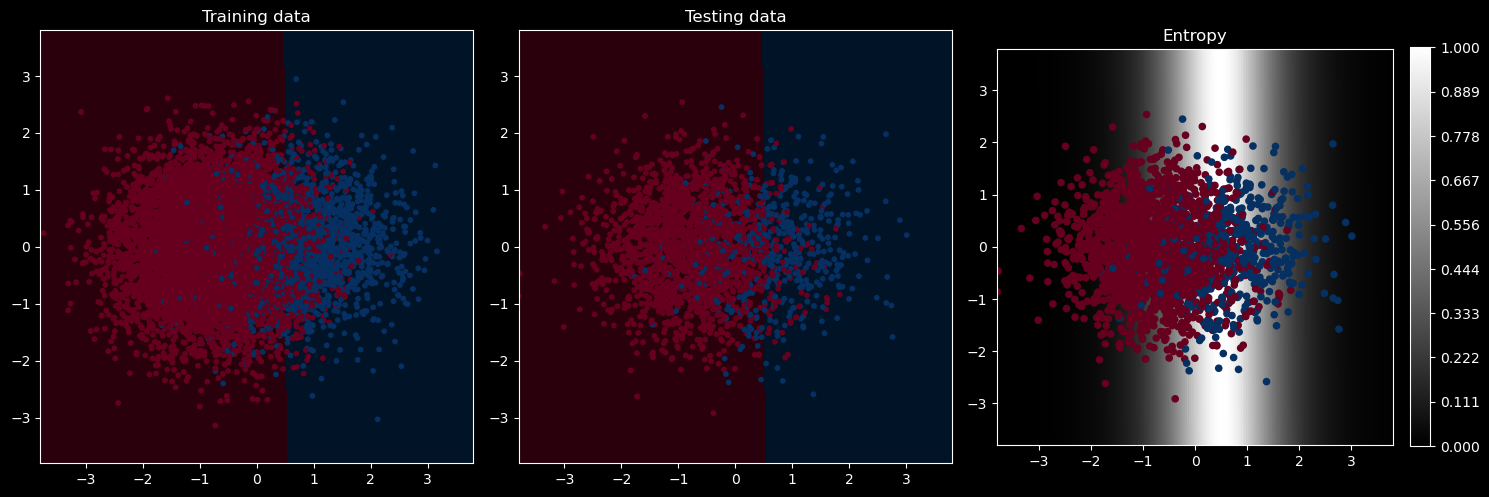



LogisticRegression(class_weight={0: 0.375, 1: 0.625})
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2000
           1       0.68      0.66      0.67       500

    accuracy                           0.87      2500
   macro avg       0.80      0.79      0.79      2500
weighted avg       0.87      0.87      0.87      2500



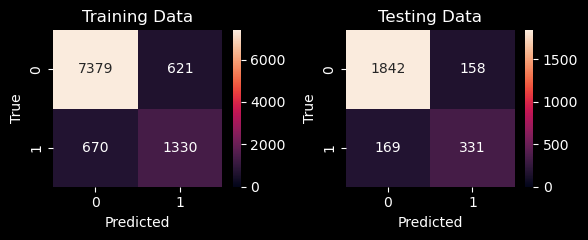

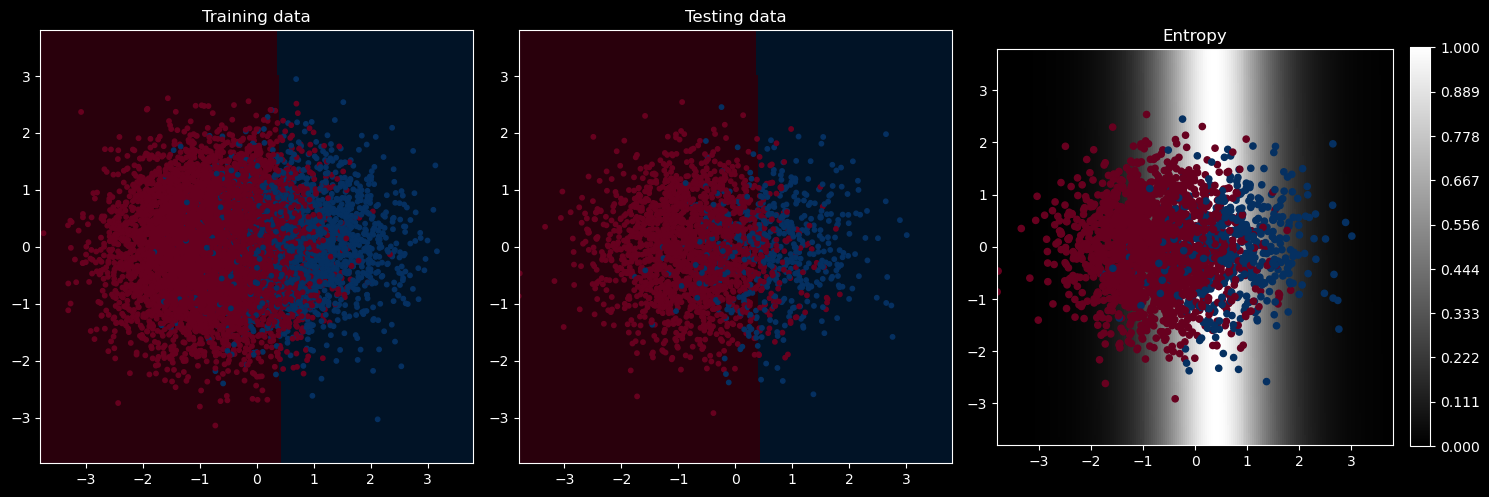



LogisticRegression(class_weight={0: 0.3125, 1: 0.6875})
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2000
           1       0.64      0.71      0.67       500

    accuracy                           0.86      2500
   macro avg       0.78      0.80      0.79      2500
weighted avg       0.87      0.86      0.86      2500



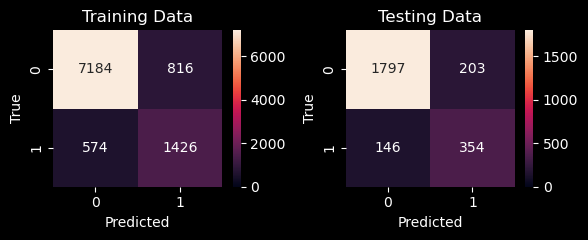

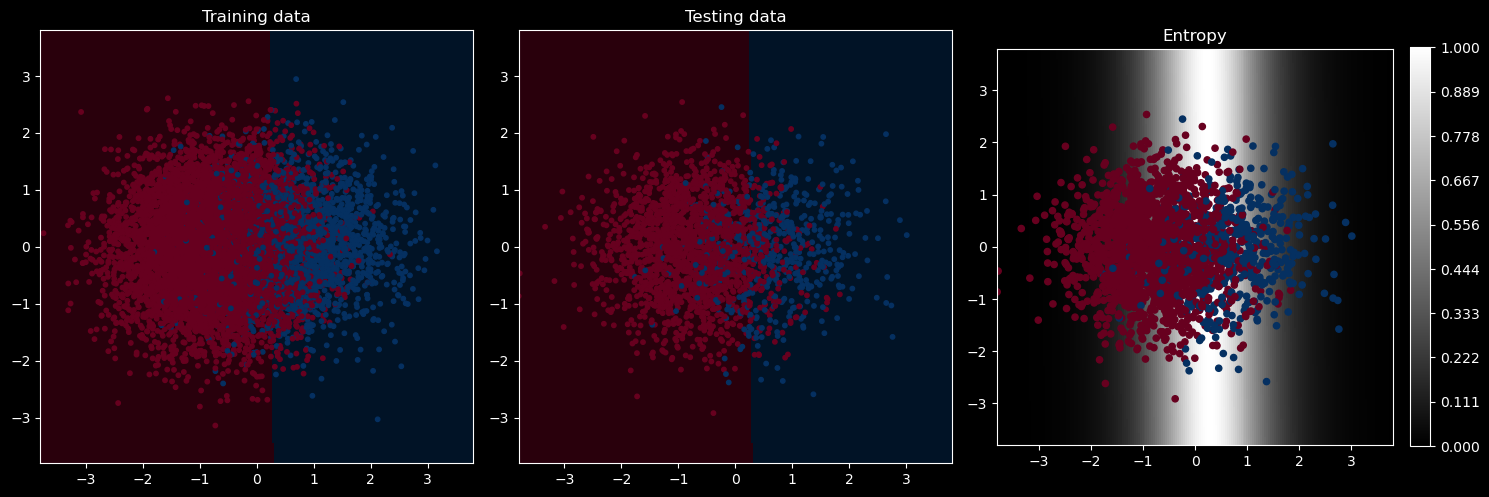



LogisticRegression(class_weight={0: 0.25, 1: 0.75})
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2000
           1       0.59      0.78      0.67       500

    accuracy                           0.85      2500
   macro avg       0.76      0.82      0.78      2500
weighted avg       0.87      0.85      0.85      2500



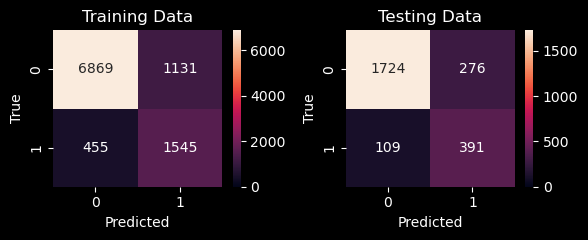

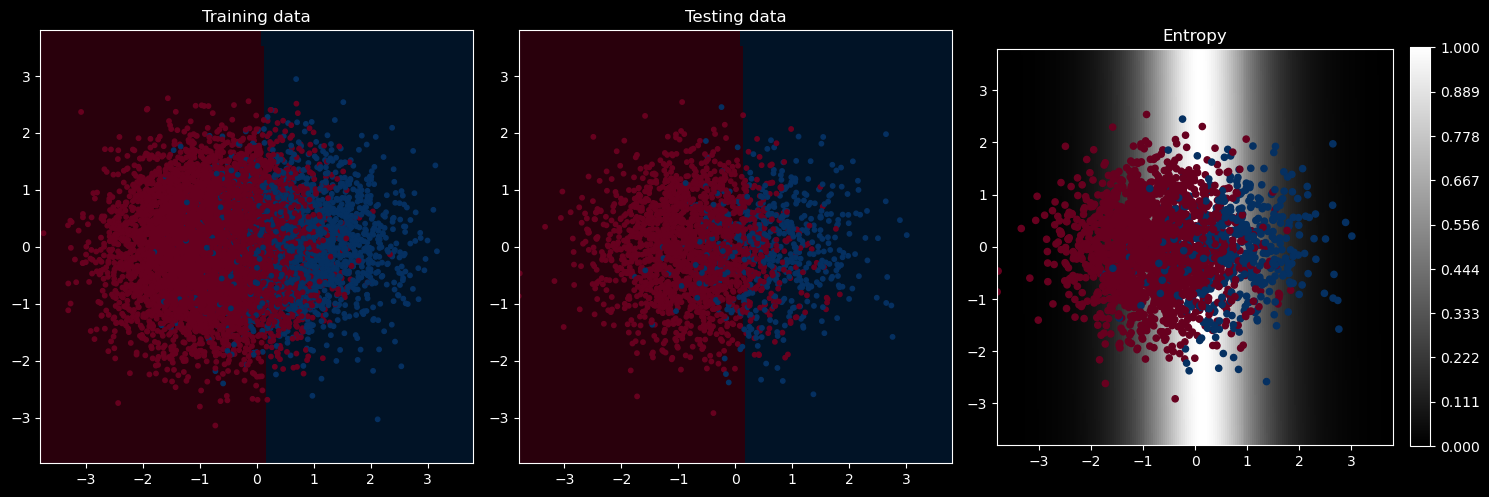



LogisticRegression(class_weight={0: 0.1875, 1: 0.8125})
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      2000
           1       0.53      0.83      0.65       500

    accuracy                           0.82      2500
   macro avg       0.74      0.82      0.76      2500
weighted avg       0.87      0.82      0.83      2500



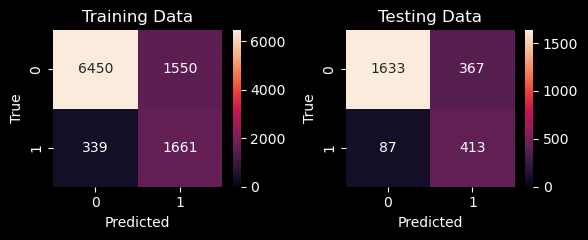

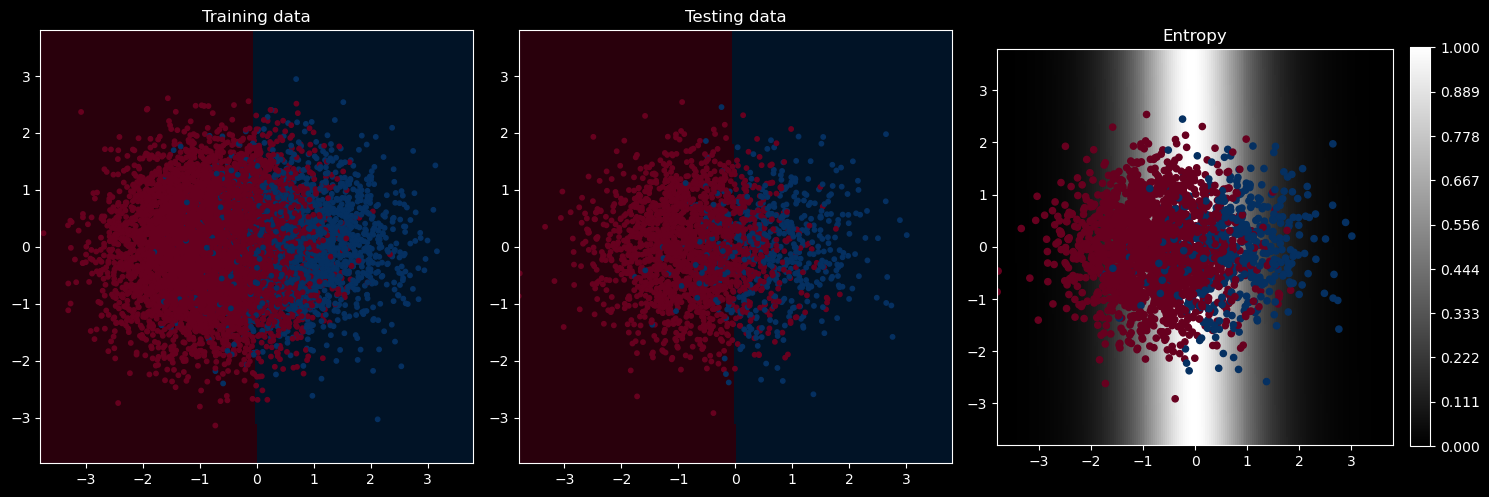



LogisticRegression(class_weight={0: 0.125, 1: 0.875})
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      2000
           1       0.45      0.89      0.60       500

    accuracy                           0.76      2500
   macro avg       0.71      0.81      0.72      2500
weighted avg       0.86      0.76      0.78      2500



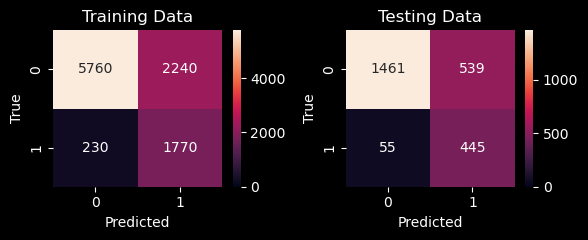

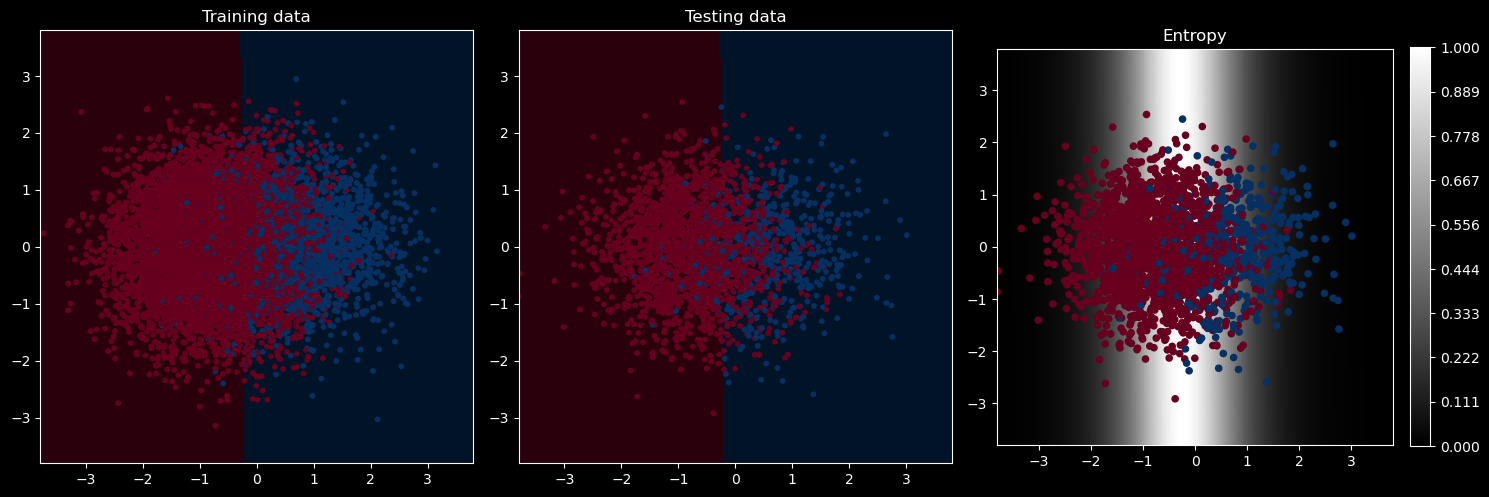



LogisticRegression(class_weight={0: 0.0625, 1: 0.9375})
              precision    recall  f1-score   support

           0       0.98      0.55      0.71      2000
           1       0.35      0.96      0.51       500

    accuracy                           0.63      2500
   macro avg       0.66      0.76      0.61      2500
weighted avg       0.86      0.63      0.67      2500



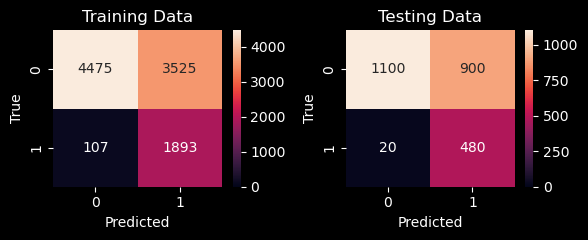

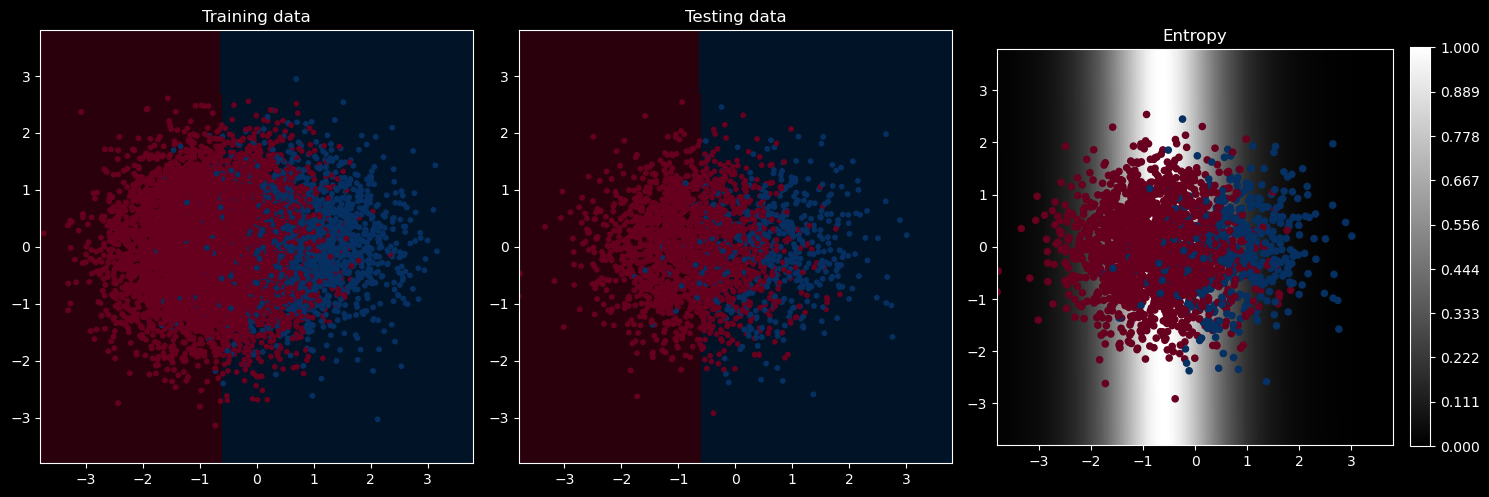

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report

n_plot = 15

w = np.linspace(0,1,n_plot+2)[1:-1]

pre = np.zeros((n_plot,2))
rec = np.zeros((n_plot,2))
f1  = np.zeros((n_plot,2))

confs = []
for i in range(n_plot):
    class_weight = {
        0:1-w[i], # negative class
        1:w[i]    # positive class
    }
    model = LogisticRegression(class_weight=class_weight)
    #model = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, class_weight=class_weight)
    model.fit(X_train, y_train)
    print(model)
    
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    print(classification_report(y_test, y_test_pred))
    
    conf_matrix_train = confusion_matrix(y_train, y_train_pred).astype(int)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred).astype(int)
    confs.append(conf_matrix_test)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))
    
    sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Training Data")
    
    sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")
    axes[1].set_title("Testing Data")

    plt.tight_layout()
    plt.show()

    B, S = visualize_regions(model, MAX, 200)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    
    extent = [-MAX,MAX,-MAX,MAX]
    
    cmap = "RdBu"
    axes[0].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap=cmap);
    axes[0].set_aspect('equal')
    axes[0].set_title('Training data');
    
    axes[1].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=10, cmap=cmap);
    axes[1].set_aspect('equal')
    axes[1].set_title('Testing data');
    
    im = axes[2].imshow(S, interpolation='none', extent=extent,cmap='gray')
    axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap=cmap);
    axes[2].set_aspect('equal')
    axes[2].set_title('Entropy')
    cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    cbar.set_ticks(np.linspace(0, math.log(y.max()+1,2), 10))

    plt.tight_layout()
    plt.show()
    
    p, r, f, s = precision_recall_fscore_support(y_test, y_test_pred)
    
    pre[i,0] = p[0]
    pre[i,1] = p[1]
    
    rec[i,0] = r[0]
    rec[i,1] = r[1]
    
    f1[i,0] = f[0]
    f1[i,1] = f[1]

    print()
    print()
# end
confs = np.array(confs)

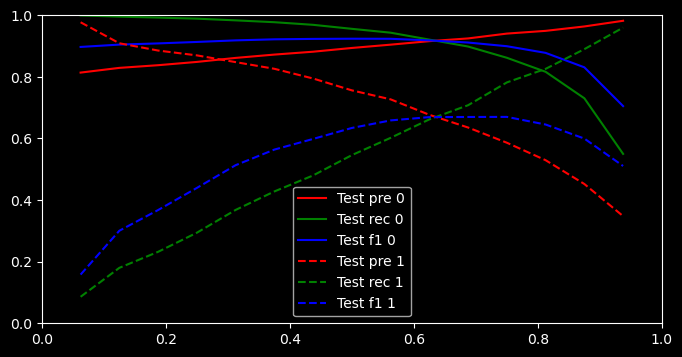

In [20]:
plt.figure(figsize=(8,4));

plt.plot( w, pre[:,0], 'r', label='Test pre 0' )
plt.plot( w, rec[:,0], 'g', label='Test rec 0' )
plt.plot( w, f1[:,0],  'b', label='Test f1 0' )
plt.plot( w, pre[:,1], 'r--', label='Test pre 1' )
plt.plot( w, rec[:,1], 'g--', label='Test rec 1' )
plt.plot( w, f1[:,1],  'b--', label='Test f1 1' )
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()

## Applied example to decide which weights to use (reward matrix)

[   38000    45000    41000    37000    19000   -11000   -70000  -167000
  -264000  -459000  -661000  -989000 -1422000 -2250000 -4020000]


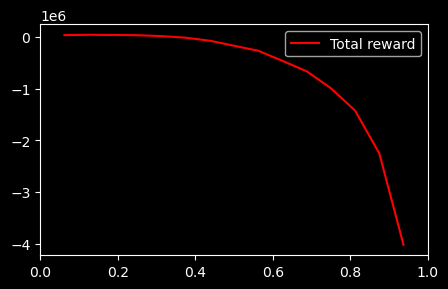

Optimal weight for max reward: 0.125


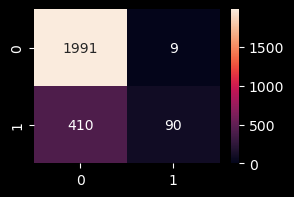

In [24]:
reward_matrix = np.array(
    [[   0, -5000],
     [   0,  1000]]
)

rewards = []
for conf in confs:
    rewards.append( (conf * reward_matrix).sum() )
# end
rewards = np.array(rewards)
print(rewards)

plt.figure(figsize=(5,3));
plt.plot( w, rewards, 'r', label='Total reward' )
plt.xlim(0,1)
plt.legend()
plt.show()

idx_max = np.argmax(rewards)
print("Optimal weight for max reward:", w[idx_max])

plt.figure(figsize=(3,2));
sns.heatmap(confs[idx_max], annot=True, vmin=0, fmt='d')
plt.show()

## Inverse frequency class weights

{0: 0.2, 1: 0.8}
LogisticRegression(class_weight='balanced')
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      2000
           1       0.54      0.82      0.65       500

    accuracy                           0.83      2500
   macro avg       0.75      0.82      0.77      2500
weighted avg       0.87      0.83      0.84      2500



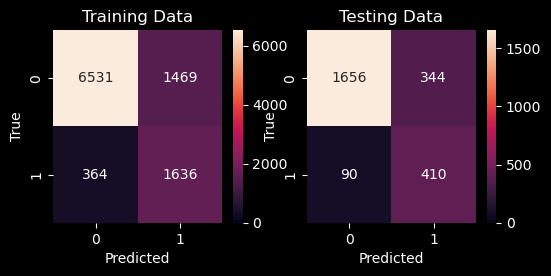

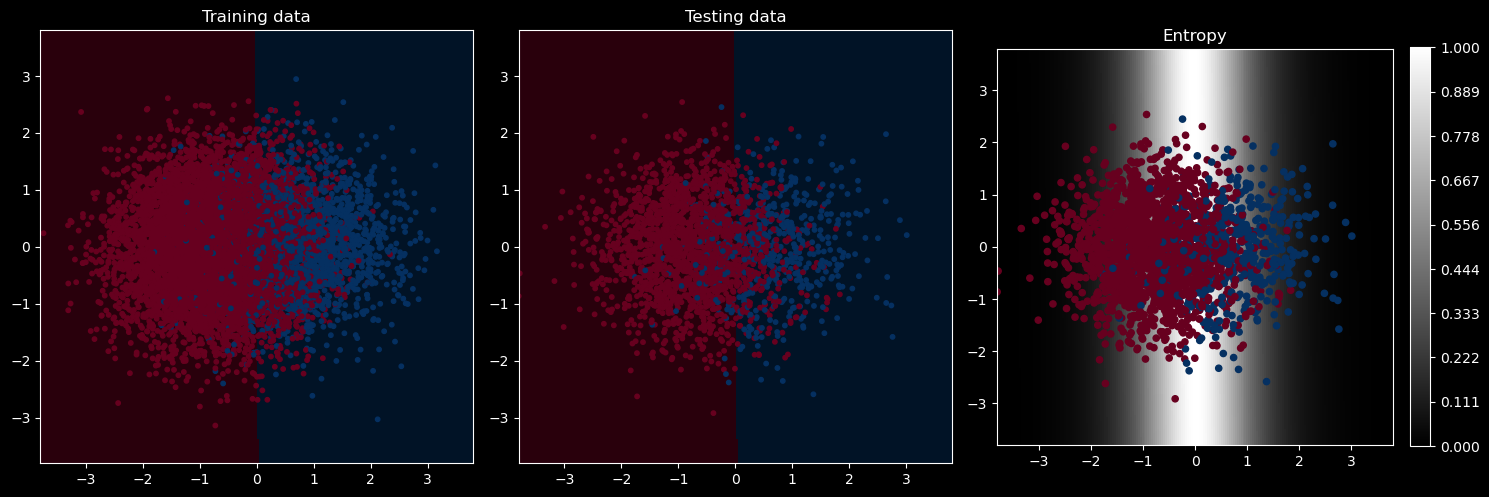

In [25]:
class_weight = np.array([1.0/n_pts0, 1.0/n_pts1])
class_weight = class_weight / class_weight.sum()
class_weight = { 0:class_weight[0], 1:class_weight[1] }
print(class_weight)

model = LogisticRegression(
    #class_weight=class_weight
    class_weight='balanced'
)

model.fit(X_train, y_train)
print(model)

y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

print(classification_report(y_test, y_test_pred))

conf_matrix_train = confusion_matrix(y_train, y_train_pred).astype(int)
conf_matrix_test = confusion_matrix(y_test, y_test_pred).astype(int)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))

sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Training Data")

sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Testing Data")

plt.show()

B, S = visualize_regions(model, MAX, 200)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

extent = [-MAX,MAX,-MAX,MAX]

cmap = "RdBu"
axes[0].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap=cmap);
axes[0].set_aspect('equal')
axes[0].set_title('Training data');

axes[1].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=10, cmap=cmap);
axes[1].set_aspect('equal')
axes[1].set_title('Testing data');

im = axes[2].imshow(S, interpolation='none', extent=extent,cmap='gray')
axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap=cmap);
axes[2].set_aspect('equal')
axes[2].set_title('Entropy')
cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
cbar.set_ticks(np.linspace(0, math.log(y.max()+1,2), 10))

plt.tight_layout()
plt.show()